In [1]:
%matplotlib inline
%matplotlib notebook
# %load_ext autoreload
# %autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/2/hw1x.dat') as x:
    x = [float(o) for o in x.readlines() if o.strip() != '']
with open('data/2/hw1y.dat') as y:
    y = [float(o) for o in y.readlines() if o.strip() != '']

In [3]:
assert(len(x) == len(y))

### plot data

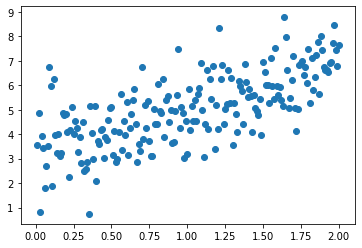

In [4]:
plt.scatter(x, y)

### plot with closed formula

In [5]:
x = np.concatenate([np.array(x)[np.newaxis, :], np.ones( (1, len(x)) )], axis=0).T

In [6]:
# use np built in function to test the values
# m, c = np.linalg.lstsq(x, y, rcond=None)[0]
# m, c

In [7]:
w = np.linalg.inv(np.dot(x.T, x)).dot(np.dot(x.T, y))
w

array([1.78157138, 3.2447227 ])

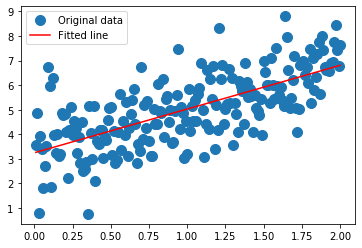

In [8]:
plt.plot(x[:, 0], y, 'o', label='Original data', markersize=10)
plt.plot(x[:, 0], np.dot(x, w), 'r', label='Fitted line')
plt.legend()

### 3. Empirical Risk

In [9]:
loss = np.mean(np.square(np.dot(x, w) - y)) / 2
loss

0.5812605752543937

### 4. Gradient descent

In [11]:
learning_rate = 0.001
def SGD(x, y, w, iteration):
    loss = 0
    temp = 0
    for x_i, y_i in zip(x, y):
        temp += -(y_i-np.dot(x_i,w)) * learning_rate * x_i
        loss += np.square(y_i-np.dot(x_i,w)) / 2
    w -= (temp / len(x))
    if iteration % 10 ==0: print(f'iteration {iteration}: {loss/len(x)}')
    return w

In [14]:
w = np.zeros(2)
for iteration in range(100):
    w = SGD(x, y, w, iteration)
    
print(f"theta {w} have the smallest empiracal weight")

iteration 0: 13.78687607332783
iteration 10: 13.225411013517201
iteration 20: 12.688030086152576
iteration 30: 12.173699547612884
iteration 40: 11.681430026792343
iteration 50: 11.210274620444082
iteration 60: 10.759327070279813
iteration 70: 10.327720018316018
iteration 80: 9.914623337108132
iteration 90: 9.519242531658188
theta [0.50703684 0.4540642 ] have the smallest empiracal weight


### Stochastic Gradient Descent

In [17]:
learning_rate = 0.001
def SGD(x, y, w, iteration):
    loss = 0
    for x_i, y_i in zip(x, y):
        w -= -(y_i-np.dot(x_i,w)) * learning_rate * x_i
        loss += np.square(y_i-np.dot(x_i,w)) / 2
    if iteration % 10 ==0: print(f'iteration {iteration}: {loss/len(x)}')
    return w

In [18]:
w = np.zeros(2)
for iteration in range(50):
    w = SGD(x, y, w, iteration)
    
print(f"theta {w} have the smallest empiracal weight")

iteration 0: 9.43191231139308
iteration 10: 0.6440701416521039
iteration 20: 0.613837096398761
iteration 30: 0.5988287581233418
iteration 40: 0.5905570120287928
theta [1.96487051 3.02605702] have the smallest empiracal weight


### Function for closed form formula

In [19]:
def fit_under_order(x_1d, y, n):
    """
    x: np.array
    y: np.array
    """
    temp = []
    for i in range(n+1):
        temp.append(np.power(x_1d, i))
    x = np.vstack(temp).T
    w = np.linalg.lstsq(x, y, rcond=None)[0]
    loss = np.mean(np.square(np.dot(x, w)-y))
    return w, loss

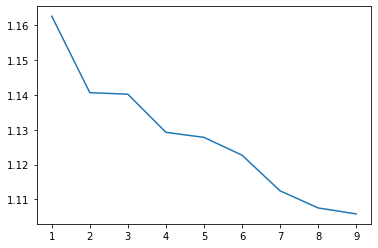

In [20]:
losses = [fit_under_order(x[:, 0], y, i)[1] for i in range(1, 10)]
plt.plot(range(1, 10), losses)